In [2104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Interval


from numpy import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from xgboost import XGBClassifier

import operator

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score

"""import tensorflow as tf
from tensorflow import keras
import cv2 as cv
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical"""

'import tensorflow as tf\nfrom tensorflow import keras\nimport cv2 as cv\nfrom tensorflow.keras import layers\nfrom tensorflow.keras import models\nfrom tensorflow.keras.utils import to_categorical'

In [2105]:
train_titanic=pd.read_csv(r"train_titanic.csv")
test_titanic=pd.read_csv(r"test_titanic.csv")
print(train_titanic.shape)
print(test_titanic.shape)


(891, 12)
(418, 11)


In [2106]:
print(train_titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [2107]:
print(train_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [2108]:
"REPLACE MISSING VALUES WITH MEAN FOR NUMERICAL AND MODE FOR CATEGORICAL"
print(test_titanic['Age'].isna().sum())
train_titanic['Age'] = train_titanic['Age'].fillna(train_titanic['Age'].mean())
test_titanic['Age'] = test_titanic['Age'].fillna(test_titanic['Age'].mean())
print(test_titanic['Age'].isna().sum())
test_titanic['Age'] = test_titanic['Age'].fillna(test_titanic['Age'].mean())
print(test_titanic['Age'].isna().sum())

embarked_mode_train=(train_titanic['Embarked'].mode(),'MODE')
embarked_mode_test=(test_titanic['Embarked'].mode(),'MODE')


train_titanic.drop(['Cabin'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Cabin'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES


86
0
0


In [2109]:
#fghjk,.

In [2110]:
train_titanic['Embarked'] = train_titanic['Embarked'].fillna(embarked_mode_train[1])
test_titanic['Embarked'] = test_titanic['Embarked'].fillna(embarked_mode_test[1])

print(train_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [2111]:
train_titanic.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

  Embarked  Survived
1     MODE  1.000000
0        C  0.553571
2        Q  0.389610
3        S  0.336957


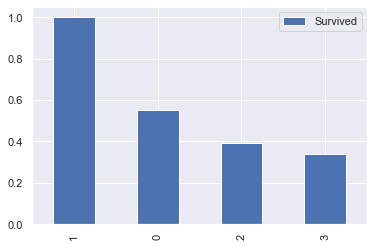

In [2112]:
"""NUMBER OF SURVIVORS PER EMBARKED PORT"""
train_titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar()
print(train_titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1            136
2             87
3            119


<AxesSubplot:xlabel='Pclass'>

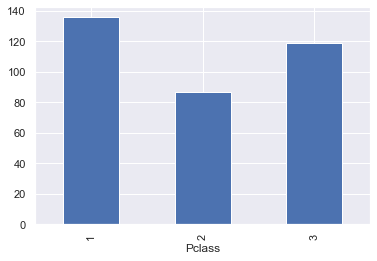

In [2113]:
"""NUMBER OF SURVIVORS PER CLASS"""
print(train_titanic.pivot_table(index='Pclass', values='Survived' , aggfunc=np.sum))
(train_titanic.groupby('Pclass')['Survived'].sum().plot.bar())

In [2114]:
print(136/(136+80))
print(119/(372+119))
print(87/(87+97))

0.6296296296296297
0.24236252545824846
0.47282608695652173


Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64
[[80, 97, 372], [136, 87, 119]] groups_class_ordered
[1, 2, 3] class_categories_train
[80, 97, 372]
[136, 87, 119]
[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]
[0.24236252545824846, 0.6296296296296297, 0.24236252545824846, 0.6296296296296297, 0.24236252545824846, 0.24236252545824846, 0.6296296296296297, 0.24236252545824846, 0.24236252545824846, 0.47282608695652173]
[3, 1, 3, 1, 3, 3, 1, 3, 3, 2]
[0.24236252545824846, 0.24236252545824846, 0.47282608695652173, 0.24236252545824846, 0.24236252545824846, 0.24236252545824846, 0.24236252545824846, 0.47282608695652173, 0.24236252545824846, 0.24236252545824846]
[3, 3, 2, 3, 3, 3, 3, 2, 3, 3]


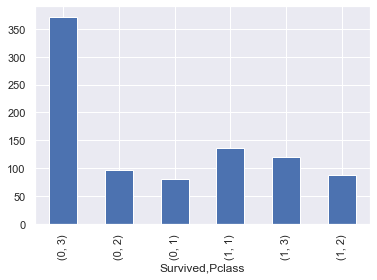

In [2115]:
"PERCENTAGE OF SURVIVORS PER CLASS"

(train_titanic.groupby('Survived')['Pclass'].value_counts().plot.bar())

groups_class=(train_titanic.groupby('Survived')['Pclass'].value_counts())
print((groups_class))

groups_class_ordered=list(groups_class.unstack(fill_value=0).T.to_dict('list').values())
print(groups_class_ordered,'groups_class_ordered')

class_categories_zero=groups_class_ordered[0]
class_categories_one=groups_class_ordered[1]

class_categories_train=(sorted(train_titanic.Pclass.value_counts().index.tolist()) )
print(class_categories_train,'class_categories_train')

print(class_categories_zero)
print(class_categories_one)
class_zipped_groups=zip(class_categories_zero,class_categories_one)
class_summed_zip=[x + y for (x, y) in class_zipped_groups]
class_zipped_prop=zip(class_categories_one,class_summed_zip)
class_group_list_proportion=[x / y for (x, y) in class_zipped_prop]

print(class_group_list_proportion)

list_prop_class_train=[]
for i in train_titanic.Pclass:
    for j in class_categories_train:
        if i == (j):
            list_prop_class_train.append(class_group_list_proportion[class_categories_train.index(j)])
print(list_prop_class_train[:10])
print(train_titanic['Pclass'].tolist()[:10])

list_prop_class_test=[]
#missing_age=[]
for i in test_titanic.Pclass:
    for j in class_categories_train:
        if i == (j):
            list_prop_class_test.append(class_group_list_proportion[class_categories_train.index(j)])
        #elif i is np.nan:
         #   list_prop_age_groups_test.append('nan')
print(list_prop_class_test[:10])
print(test_titanic['Pclass'].tolist()[:10])

train_titanic['class_surv_prop']=list_prop_class_train
test_titanic['class_surv_prop']=list_prop_class_test

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64
[[81, 468], [233, 109]] groups_sex_ordered
['female', 'male'] sex_categories_train
[81, 468]
[233, 109]
[0.7420382165605095, 0.18890814558058924]
[0.18890814558058924, 0.7420382165605095, 0.7420382165605095, 0.7420382165605095, 0.18890814558058924, 0.18890814558058924, 0.18890814558058924, 0.18890814558058924, 0.7420382165605095, 0.7420382165605095]
['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female']
[0.18890814558058924, 0.7420382165605095, 0.18890814558058924, 0.18890814558058924, 0.7420382165605095, 0.18890814558058924, 0.7420382165605095, 0.18890814558058924, 0.7420382165605095, 0.18890814558058924]
['male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'male']


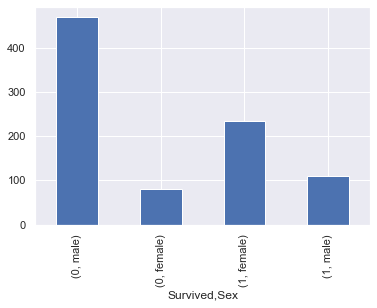

In [2116]:
"PERCENTAGE OF SURVIVORS PER GENDER"


(train_titanic.groupby('Survived')['Sex'].value_counts().plot.bar())

groups_sex=(train_titanic.groupby('Survived')['Sex'].value_counts())
print((groups_sex))

groups_sex_ordered=list(groups_sex.unstack(fill_value=0).T.to_dict('list').values())
print(groups_sex_ordered,'groups_sex_ordered')

sex_categories_zero=groups_sex_ordered[0]
sex_categories_one=groups_sex_ordered[1]

sex_categories_train= sorted(train_titanic.Sex.value_counts().index.tolist())
print(sex_categories_train,'sex_categories_train')

print(sex_categories_zero)
print(sex_categories_one)
sex_zipped_groups=zip(sex_categories_zero,sex_categories_one)
sex_summed_zip=[x + y for (x, y) in sex_zipped_groups]
sex_zipped_prop=zip(sex_categories_one,sex_summed_zip)
sex_group_list_proportion=[x / y for (x, y) in sex_zipped_prop]

print(sex_group_list_proportion)

list_prop_sex_train=[]
for i in train_titanic.Sex:
    for j in sex_categories_train:
        if i == (j):
            list_prop_sex_train.append(sex_group_list_proportion[sex_categories_train.index(j)])
print(list_prop_sex_train[:10])
print(train_titanic['Sex'].tolist()[:10])

list_prop_sex_test=[]
#missing_age=[]
for i in test_titanic.Sex:
    for j in sex_categories_train:
        if i == (j):
            list_prop_sex_test.append(sex_group_list_proportion[sex_categories_train.index(j)])
        #elif i is np.nan:
         #   list_prop_age_groups_test.append('nan')
print(list_prop_sex_test[:10])
print(test_titanic['Sex'].tolist()[:10])

train_titanic['sex_surv_prop']=list_prop_sex_train
test_titanic['sex_surv_prop']=list_prop_sex_test

Survived  Age_Groups      
0         (24.294, 32.252]    229
          (16.336, 24.294]    114
          (32.252, 40.21]      66
          (40.21, 48.168]      46
          (8.378, 16.336]      27
          (48.168, 56.126]     24
          (0.34, 8.378]        18
          (56.126, 64.084]     15
          (64.084, 72.042]      9
          (72.042, 80.0]        1
1         (24.294, 32.252]    117
          (16.336, 24.294]     63
          (32.252, 40.21]      52
          (0.34, 8.378]        36
          (40.21, 48.168]      24
          (48.168, 56.126]     21
          (8.378, 16.336]      19
          (56.126, 64.084]      9
          (72.042, 80.0]        1
Name: Age_Groups, dtype: int64


<AxesSubplot:xlabel='Survived,Age_Groups'>

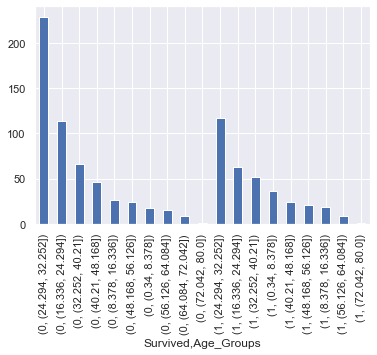

In [2117]:
"NUMBER OF SURVIVORS PER AGE GROUP"
train_titanic['Age_Groups'],bins = pd.cut(train_titanic['Age'],10,retbins=True)

#train_titanic['Age_Groups'], bins = pd.cut(train_titanic['Age_Groups'], 10, retbins=True)
test_titanic['Age_Groups']= pd.cut(test_titanic['Age'], bins=bins)



print(train_titanic.groupby('Survived')['Age_Groups'].value_counts())
pd.options.display.min_rows = 1000
(train_titanic.groupby('Survived')['Age_Groups'].value_counts().plot.bar())



In [2118]:
print(bins)

[ 0.34042  8.378   16.336   24.294   32.252   40.21    48.168   56.126
 64.084   72.042   80.     ]


In [2119]:
print (len(train_titanic['Age_Groups']))
print (len(test_titanic['Age_Groups']))


891
418


In [2120]:
"""feat='Age_Groups'
train_titanic[[feat, 'Survived']].groupby([feat], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar()
survival_probability_age_range=(train_titanic[[feat, 'Survived']].groupby([feat], as_index=False).mean().sort_values(by='Survived', ascending=False))
survival_probability_age_range_list=(survival_probability_age_range.values.tolist())
print(survival_probability_age_range)
print(survival_probability_age_range.values.tolist())
"""
#CONTINUE LIKE LABELS BELOW

"feat='Age_Groups'\ntrain_titanic[[feat, 'Survived']].groupby([feat], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar()\nsurvival_probability_age_range=(train_titanic[[feat, 'Survived']].groupby([feat], as_index=False).mean().sort_values(by='Survived', ascending=False))\nsurvival_probability_age_range_list=(survival_probability_age_range.values.tolist())\nprint(survival_probability_age_range)\nprint(survival_probability_age_range.values.tolist())\n"

In [2121]:
test_titanic['Age_Groups'].fillna(test_titanic['Age_Groups'].mode()[0], inplace=True)

groups=(train_titanic.groupby('Survived')['Age_Groups'].value_counts())
#print(groups)
groups_missing_vals=list(groups.unstack(fill_value=0).T.to_dict('list').values())
print(groups_missing_vals,'groups missing vals')

age_categories_train=sorted(train_titanic.Age_Groups.value_counts().index.tolist())
print(age_categories_train,'age categ train')
n_val=float(np.nan)
#age_categories_train.append(n_val)

group_list_zero=groups_missing_vals[0]
group_list_one=groups_missing_vals[1]

print(group_list_zero,'glzero')
print(group_list_one,'glone')
zipped_groups=zip(group_list_zero,group_list_one)
summed_zip=[x + y for (x, y) in zipped_groups]
zipped_prop=zip(group_list_one,summed_zip)
group_list_proportion=[x / y for (x, y) in zipped_prop]

print(group_list_proportion,'group list proportion')

print('========================================================================================================')
age_categories_test=(test_titanic.Age_Groups.value_counts().index.tolist())
print(age_categories_test)
print('=========================================================================================================')
print(group_list_proportion,'glproportion')

list_prop_age_groups_train=[]
for i in train_titanic.Age_Groups:
    for j in age_categories_train:
        if i == (j):
            list_prop_age_groups_train.append(group_list_proportion[age_categories_train.index(j)])

print(list_prop_age_groups_train[:10])
print(train_titanic['Age_Groups'].tolist()[:10])


list_prop_age_groups_test=[]
missing_age=[]
for i in test_titanic.Age_Groups:
    for j in age_categories_train:
        if i == (j):
            list_prop_age_groups_test.append(group_list_proportion[age_categories_train.index(j)])
        #elif i is np.nan:
         #   list_prop_age_groups_test.append('nan')
        
        

        
print(list_prop_age_groups_test[:10])
print(test_titanic['Age_Groups'].tolist()[:10])

train_titanic['age_surv_prop']=list_prop_age_groups_train

test_titanic['age_surv_prop']=list_prop_age_groups_test


[[18, 27, 114, 229, 66, 46, 24, 15, 9, 1], [36, 19, 63, 117, 52, 24, 21, 9, 0, 1]] groups missing vals
[Interval(0.34, 8.378, closed='right'), Interval(8.378, 16.336, closed='right'), Interval(16.336, 24.294, closed='right'), Interval(24.294, 32.252, closed='right'), Interval(32.252, 40.21, closed='right'), Interval(40.21, 48.168, closed='right'), Interval(48.168, 56.126, closed='right'), Interval(56.126, 64.084, closed='right'), Interval(64.084, 72.042, closed='right'), Interval(72.042, 80.0, closed='right')] age categ train
[18, 27, 114, 229, 66, 46, 24, 15, 9, 1] glzero
[36, 19, 63, 117, 52, 24, 21, 9, 0, 1] glone
[0.6666666666666666, 0.41304347826086957, 0.3559322033898305, 0.33815028901734107, 0.4406779661016949, 0.34285714285714286, 0.4666666666666667, 0.375, 0.0, 0.5] group list proportion
[Interval(24.294, 32.252, closed='right'), Interval(16.336, 24.294, closed='right'), Interval(32.252, 40.21, closed='right'), Interval(40.21, 48.168, closed='right'), Interval(48.168, 56.126, 

In [2122]:
#sdfghjkl;

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64
[[398, 97, 15, 12, 15, 5, 7], [210, 112, 13, 4, 3, 0, 0]] groups_sib_ordered
[0, 1, 2, 3, 4, 5, 8] sib_categories_train
[398, 97, 15, 12, 15, 5, 7]
[210, 112, 13, 4, 3, 0, 0]
[0.34539473684210525, 0.5358851674641149, 0.4642857142857143, 0.25, 0.16666666666666666, 0.0, 0.0]
[0.5358851674641149, 0.5358851674641149, 0.34539473684210525, 0.5358851674641149, 0.34539473684210525, 0.34539473684210525, 0.34539473684210525, 0.25, 0.34539473684210525, 0.5358851674641149]
[1, 1, 0, 1, 0, 0, 0, 3, 0, 1]
[0.34539473684210525, 0.5358851674641149, 0.34539473684210525, 0.34539473684210525, 0.5358851674641149, 0.34539473684210525, 0.34539473684210525, 0.5358851674641149, 0.34539473684210525

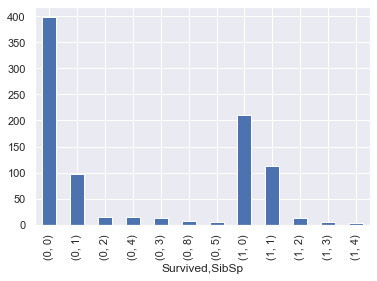

In [2123]:
"NUMBER OF SURVIVORS ACCORDING TO HOW MANY SIBLINGS ABOARD"


(train_titanic.groupby('Survived')['SibSp'].value_counts().plot.bar())

groups_sib=(train_titanic.groupby('Survived')['SibSp'].value_counts())
print((groups_sib))

groups_sib_ordered=list(groups_sib.unstack(fill_value=0).T.to_dict('list').values())
print(groups_sib_ordered,'groups_sib_ordered')

sib_categories_zero=groups_sib_ordered[0]
sib_categories_one=groups_sib_ordered[1]

sib_categories_train=(sorted(train_titanic.SibSp.value_counts().index.tolist()) )
print(sib_categories_train,'sib_categories_train')

print(sib_categories_zero)
print(sib_categories_one)
sib_zipped_groups=zip(sib_categories_zero,sib_categories_one)
sib_summed_zip=[x + y for (x, y) in sib_zipped_groups]
sib_zipped_prop=zip(sib_categories_one,sib_summed_zip)
sib_group_list_proportion=[x / y for (x, y) in sib_zipped_prop]

print(sib_group_list_proportion)

list_prop_sib_train=[]
for i in train_titanic.SibSp:
    for j in sib_categories_train:
        if i == (j):
            list_prop_sib_train.append(sib_group_list_proportion[sib_categories_train.index(j)])
print(list_prop_sib_train[:10])
print(train_titanic['SibSp'].tolist()[:10])

list_prop_sib_test=[]
#missing_age=[]
for i in test_titanic.SibSp:
    for j in sib_categories_train:
        if i == (j):
            list_prop_sib_test.append(sib_group_list_proportion[sib_categories_train.index(j)])
        #elif i is np.nan:
         #   list_prop_age_groups_test.append('nan')
print(list_prop_sib_test[:10])
print(test_titanic['SibSp'].tolist()[:10])

train_titanic['sib_surv_prop']=list_prop_sib_train
test_titanic['sib_surv_prop']=list_prop_sib_test

In [2124]:
categorical_values=[i for i in train_titanic.columns if train_titanic.dtypes[i]=='object']
print(categorical_values)


['Name', 'Sex', 'Ticket', 'Embarked']


In [2125]:
categorical_values_test=[i for i in test_titanic.columns if test_titanic.dtypes[i]=='object']
print(categorical_values_test)


['Name', 'Sex', 'Ticket', 'Embarked']


In [2126]:
"REPLACE NAME COLUMN WITH TITLES ONLY"

#CAPITALIZE ALL CELLS
train_titanic['Name'] = train_titanic['Name'].str.upper()
test_titanic['Name'] = test_titanic['Name'].str.upper()


titles = ['MRS.','MR.','DR.','MASTER.','MISS.']

titles_list_train=[]
for i in train_titanic['Name'].values.tolist():
    contains=False
    for j in titles:
        if j in i:
            contains = True
            break
    if contains:
        titles_list_train.append(j)
    else:
        titles_list_train.append(i)
print(titles_list_train)
print('==============================================================================')

print('==============================================================================')

print('==============================================================================')

titles_list_test=[]
for i in test_titanic['Name'].values.tolist():
    contains = False
    for j in titles:
        if j in i:
            contains=True
            break
    if contains:
        titles_list_test.append(j)
    else:
        titles_list_test.append(i)
        
print(titles_list_test)


#train_titanic['titles'] = titles_list_train
#test_titanic['titles'] = titles_list_test


['MR.', 'MRS.', 'MISS.', 'MRS.', 'MR.', 'MR.', 'MR.', 'MASTER.', 'MRS.', 'MRS.', 'MISS.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MRS.', 'MASTER.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'URUCHURTU, DON. MANUEL E', 'MRS.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MISS.', 'MRS.', 'MRS.', 'MR.', 'MISS.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MRS.', 'MASTER.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MASTER.', 'MR.', 'MISS.', 'MR.', 'MASTER.', 'MR.', 'MASTER.', 'MRS.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MASTER.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MR.'

In [2127]:
"""MISSING TITLES TRAIN"""
missing_titles_train=[]
for i in titles_list_train:
    has=True
    for j in titles:
        if j in i:
            has=False
            break
    if has:
        missing_titles_train.append(i)
print(( missing_titles_train))
#for i in missing_titles_train:
 #   print(titles_list_train.index(i))
    

['URUCHURTU, DON. MANUEL E', 'BYLES, REV. THOMAS ROUSSEL DAVIDS', 'BATEMAN, REV. ROBERT JAMES', 'CARTER, REV. ERNEST COURTENAY', 'AUBART, MME. LEONTINE PAULINE', 'REYNALDO, MS. ENCARNACION', 'PEUCHEN, MAJOR. ARTHUR GODFREY', 'BUTT, MAJOR. ARCHIBALD WILLINGHAM', 'DUFF GORDON, LADY. (LUCILLE CHRISTIANA SUTHERLAND) ("MRS MORGAN")', 'DUFF GORDON, SIR. COSMO EDMUND ("MR MORGAN")', 'KIRKLAND, REV. CHARLES LEONARD', 'SAGESSER, MLLE. EMMA', 'SIMONIUS-BLUMER, COL. OBERST ALFONS', 'WEIR, COL. JOHN', 'MAYNE, MLLE. BERTHE ANTONINE ("MRS DE VILLIERS")', 'CROSBY, CAPT. EDWARD GIFFORD', 'ROTHES, THE COUNTESS. OF (LUCY NOEL MARTHA DYER-EDWARDS)', 'REUCHLIN, JONKHEER. JOHN GEORGE', 'HARPER, REV. JOHN', 'MONTVILA, REV. JUOZAS']


In [2128]:
"ENCODE REST OF NAMES IN TRAIN DATASET"
rem_titles=['DON','REV','MME.','MS.','MAJOR.','LADY.','SIR','MLLE.','COL.','CAPT','COUNTESS.','JONKHEER.','DONA']

titles_list_train_cleaned=[]
for i in titles_list_train:
    contains=False
    for j in rem_titles:
        if j in i:
            contains = True
            break
    if contains:
        titles_list_train_cleaned.append(j)
    else:
        titles_list_train_cleaned.append(i)
print(titles_list_train_cleaned)

['MR.', 'MRS.', 'MISS.', 'MRS.', 'MR.', 'MR.', 'MR.', 'MASTER.', 'MRS.', 'MRS.', 'MISS.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MRS.', 'MASTER.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'DON', 'MRS.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MISS.', 'MRS.', 'MRS.', 'MR.', 'MISS.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MRS.', 'MASTER.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MASTER.', 'MR.', 'MISS.', 'MR.', 'MASTER.', 'MR.', 'MASTER.', 'MRS.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MASTER.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MASTER.', 'MR.', '

In [2129]:

"""MISSING TITLES TEST"""
missing_titles_test=[]
for i in titles_list_test:
    has=True
    for j in titles:
        if j in i:
            has=False
            break
    if has:
        missing_titles_test.append(i)
print(( missing_titles_test))


["O'DONOGHUE, MS. BRIDGET", 'GRACIE, COL. ARCHIBALD IV', 'LAHTINEN, REV. WILLIAM', 'PERUSCHITZ, REV. JOSEPH MARIA', 'ASTOR, COL. JOHN JACOB', 'OLIVA Y OCANA, DONA. FERMINA']


In [2130]:
"ENCODE REST OF NAMES IN TEST DATASET"

titles_list_test_cleaned=[]
for i in titles_list_test:
    contains=False
    for j in rem_titles:
        if j in i:
            contains = True
            break
    if contains:
        titles_list_test_cleaned.append(j)
    else:
        titles_list_test_cleaned.append(i)
print(titles_list_test_cleaned)


['MR.', 'MRS.', 'MR.', 'MR.', 'MRS.', 'MR.', 'MISS.', 'MR.', 'MRS.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MRS.', 'MR.', 'MASTER.', 'MRS.', 'MR.', 'MRS.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MISS.', 'MR.', 'MASTER.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MASTER.', 'MRS.', 'MISS.', 'MR.', 'MR.', 'MRS.', 'MISS.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MR.', 'MR.', 'MRS.', 'MR.', 'MISS.', 'MASTER.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MISS.', 'DON', 'MASTER.', 'MRS.', 'MR.', 'MRS.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MR.', 'MISS.', 'MR.', 'MRS.', 'MR.', 'MR.', 'MR.', 'MRS.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MR.', 'MISS.', 'MISS.', 'MISS.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MRS.', 'MISS.', 'MR.', 'MRS.', 'MR.', 'MR.', 'MISS.', 'MR.', 'MISS.', 'MR.', 'M

In [2131]:
"REPLACE NAMES WITH TITLES"

train_titanic['titles'] = titles_list_train_cleaned
test_titanic['titles'] = titles_list_test_cleaned

train_titanic.drop(['Name'], axis = 1, inplace = True)
test_titanic.drop(['Name'], axis = 1, inplace = True) 

print(titles[0:10])

['MRS.', 'MR.', 'DR.', 'MASTER.', 'MISS.']


Survived  titles   
0         MR.          436
          MISS.         55
          MRS.          26
          MASTER.       17
          REV            6
          DR.            4
          CAPT           1
          COL.           1
          DON            1
          JONKHEER.      1
          MAJOR.         1
1         MISS.        127
          MRS.          99
          MR.           81
          MASTER.       23
          DR.            3
          DON            2
          MLLE.          2
          COL.           1
          COUNTESS.      1
          MAJOR.         1
          MME.           1
          MS.            1
Name: titles, dtype: int64
[[1, 1, 0, 1, 4, 1, 1, 17, 55, 0, 0, 436, 26, 0, 6], [0, 1, 1, 2, 3, 0, 1, 23, 127, 2, 1, 81, 99, 1, 0]] groups_titles_ordered
['CAPT', 'COL.', 'COUNTESS.', 'DON', 'DR.', 'JONKHEER.', 'MAJOR.', 'MASTER.', 'MISS.', 'MLLE.', 'MME.', 'MR.', 'MRS.', 'MS.', 'REV'] titles_categories_train
[1, 1, 0, 1, 4, 1, 1, 17, 55, 0, 0, 436, 26, 0, 

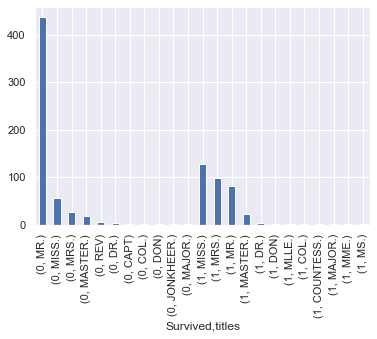

In [2132]:
"NUMBER OF SURVIVORS ACCORDING TO THEIR TITLES"


(train_titanic.groupby('Survived')['titles'].value_counts().plot.bar())

groups_titles=(train_titanic.groupby('Survived')['titles'].value_counts())
print((groups_titles))

groups_titles_ordered=list(groups_titles.unstack(fill_value=0).T.to_dict('list').values())
print(groups_titles_ordered,'groups_titles_ordered')

titles_categories_zero=groups_titles_ordered[0]
titles_categories_one=groups_titles_ordered[1]

titles_categories_train=(sorted(train_titanic.titles.value_counts().index.tolist()) )
print(titles_categories_train,'titles_categories_train')

print(titles_categories_zero)
print(titles_categories_one)
titles_zipped_groups=zip(titles_categories_zero,titles_categories_one)
titles_summed_zip=[x + y for (x, y) in titles_zipped_groups]
titles_zipped_prop=zip(titles_categories_one,titles_summed_zip)
titles_group_list_proportion=[x / y for (x, y) in titles_zipped_prop]

print(titles_group_list_proportion)

list_prop_titles_train=[]
for i in train_titanic.titles:
    for j in titles_categories_train:
        if i == (j):
            list_prop_titles_train.append(titles_group_list_proportion[titles_categories_train.index(j)])
print(list_prop_titles_train[:10])
print(train_titanic['titles'].tolist()[:10])

list_prop_titles_test=[]
#missing_age=[]
for i in test_titanic.titles:
    for j in titles_categories_train:
        if i == (j):
            list_prop_titles_test.append(titles_group_list_proportion[titles_categories_train.index(j)])
        #elif i is np.nan:
         #   list_prop_age_groups_test.append('nan')
print(list_prop_titles_test[:10])
print(test_titanic['titles'].tolist()[:10])

train_titanic['titles_surv_prop']=list_prop_titles_train
test_titanic['titles_surv_prop']=list_prop_titles_test

In [2133]:
"TICKET CLEANING"

train_titanic['Ticket'] = np.where(train_titanic['Ticket'].str.isnumeric(),train_titanic['Ticket'].str[:],train_titanic['Ticket'].str.extract("^([A-Z/]*)", expand=False))
#print(train_titanic['Ticket']) 
train_ticket_list=[]
for i in train_titanic['Ticket']:
    train_ticket_list.append(i[0:2])
    
train_titanic['Ticket']=train_ticket_list
print(train_titanic['Ticket'])


test_titanic['Ticket'] = np.where(test_titanic['Ticket'].str.isnumeric(),test_titanic['Ticket'].str[:],test_titanic['Ticket'].str.extract("^([A-Z/]*)", expand=False))
#print(train_titanic['Ticket']) 
test_ticket_list=[]
for i in test_titanic['Ticket']:
    test_ticket_list.append(i[0:2])
    
test_titanic['Ticket']=test_ticket_list
print(test_titanic['Ticket'])

0      A/
1      PC
2      ST
3      11
4      37
5      33
6      17
7      34
8      34
9      23
10     PP
11     11
12     A/
13     34
14     35
15     24
16     38
17     24
18     34
19     26
20     23
21     24
22     33
23     11
24     34
25     34
26     26
27     19
28     33
29     34
       ..
861    28
862    17
863    CA
864    23
865    23
866    SC
867    PC
868    34
869    34
870    34
871    11
872    69
873    34
874    P/
875    26
876    75
877    34
878    34
879    11
880    23
881    34
882    75
883     C
884    SO
885    38
886    21
887    11
888     W
889    11
890    37
Name: Ticket, Length: 891, dtype: object
0      33
1      36
2      24
3      31
4      31
5      75
6      33
7      24
8      26
9      A/
10     34
11     69
12     21
13     24
14      W
15     SC
16     23
17     26
18     ST
19     26
20     PC
21      C
22     PC
23     PC
24     PC
25     A/
26     11
27     26
28     11
29     26
       ..
388    36
389    34
390    12
391    PC

In [2134]:
#dasfsdfadgf

In [2135]:
test_titanic['Ticket']=test_titanic['Ticket'].replace(to_replace='^', value=0, regex=True)


In [2136]:
#train_titanic.drop(['PassengerId'], axis = 1, inplace = True) 
#test_titanic.drop(['PassengerId'], axis = 1, inplace = True) 

train_titanic.drop(['Sex'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Sex'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
train_titanic.drop(['SibSp'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['SibSp'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
train_titanic.drop(['Embarked'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Embarked'], axis = 1, inplace = True)

train_titanic.drop(['Age'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Age'], axis = 1, inplace = True)

train_titanic.drop(['Pclass'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Pclass'], axis = 1, inplace = True)

train_titanic.drop(['Ticket'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Ticket'], axis = 1, inplace = True)

train_titanic.drop(['Parch'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Parch'], axis = 1, inplace = True)
train_titanic.drop(['Fare'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Fare'], axis = 1, inplace = True)

train_titanic.drop(['Age_Groups'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['Age_Groups'], axis = 1, inplace = True)
train_titanic.drop(['titles'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['titles'], axis = 1, inplace = True)


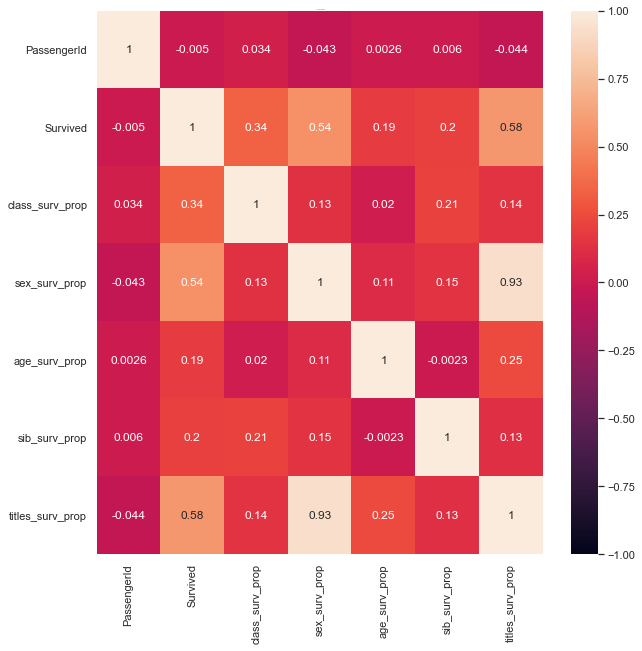

In [2137]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
heatmap = sns.heatmap(train_titanic.corr(),xticklabels=True, yticklabels=True, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':0.1}, pad=1)
plt.show()

In [2138]:
id_list_train=train_titanic['PassengerId'].values.tolist()
id_list_test=test_titanic['PassengerId'].values.tolist()
train_titanic.drop(['PassengerId'], axis = 1, inplace = True) #TOO MANY MISSING ENTRIES
test_titanic.drop(['PassengerId'], axis = 1, inplace = True)

for i in train_titanic.columns:
    for j in range(len(train_titanic['age_surv_prop'])):
        if train_titanic[i][j]>=0.7:
            train_titanic[i][j]=1
       # else:
        #    train_titanic[i][j] = 0
print(train_titanic.values[0])

for i in test_titanic.columns:
    for j in range(len(test_titanic['age_surv_prop'])):
        if test_titanic[i][j]>=0.5:
            test_titanic[i][j]=1
        #else:
         #   test_titanic[i][j] = 0
print(test_titanic.values[0])


<ipython-input-2138-a81609795fab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_titanic[i][j]=1


[0.         0.24236253 0.18890815 0.3559322  0.53588517 0.15667311]
[0.24236253 0.18890815 0.44067797 0.34539474 0.15667311]


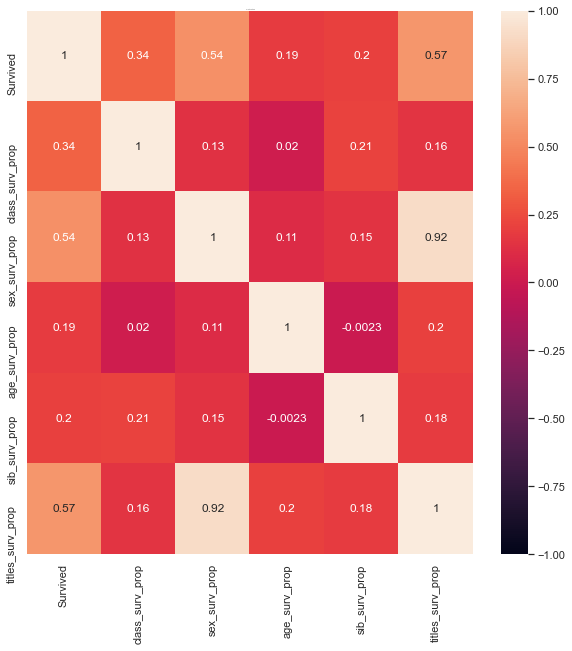

In [2139]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
heatmap = sns.heatmap(train_titanic.corr(),xticklabels=True, yticklabels=True, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':0.1}, pad=1)
plt.show()

In [2140]:
train_titanic['PassengerId']=id_list_train
test_titanic['PassengerId']=id_list_test

print(train_titanic.columns)
print(test_titanic.columns)

Index(['Survived', 'class_surv_prop', 'sex_surv_prop', 'age_surv_prop',
       'sib_surv_prop', 'titles_surv_prop', 'PassengerId'],
      dtype='object')
Index(['class_surv_prop', 'sex_surv_prop', 'age_surv_prop', 'sib_surv_prop',
       'titles_surv_prop', 'PassengerId'],
      dtype='object')


In [2141]:
#hjk,.

In [2142]:


list_df=[]
for i in train_titanic.values:
    list_df.append(i)
print(list_df[0])
print('============================')
new_list_df=[]
for i in list_df:
    new_list_df.append(i[1:6])
print(new_list_df[0])

new_list_avg=[]
for i in new_list_df:
    new_list_avg.append((sum(i))/5)
print(new_list_avg)
res=[]
for i in new_list_avg:
    if i > 0.4:   # 0.42 = .98
        res.append(1)
    else:
        res.append(0)
print(res)

[0.         0.24236253 0.18890815 0.3559322  0.53588517 0.15667311
 1.        ]
[0.24236253 0.18890815 0.3559322  0.53588517 0.15667311]
[0.29595223120254116, 0.721238552639088, 0.5247419498239785, 0.721238552639088, 0.2748032976205121, 0.25429776220364136, 0.3574544585677827, 0.38458746754110085, 0.585181510263539, 0.6843509465363012, 0.6285433114782455, 0.6095653128547867, 0.2578541450781392, 0.31290138374491405, 0.5397205876726842, 0.6569774980930587, 0.36792080087443424, 0.30039047450329603, 0.6232795963879408, 0.585181510263539, 0.32089600992016676, 0.32089600992016676, 0.5397205876726842, 0.33175118303791756, 0.5713662779854225, 0.6437851318048116, 0.25429776220364136, 0.3162286185439944, 0.5247419498239785, 0.25429776220364136, 0.4542554289641371, 0.7007330172222171, 0.5247419498239785, 0.23276041669982778, 0.36984926916231947, 0.3707906399302799, 0.25429776220364136, 0.2578541450781392, 0.5520765281871982, 0.5778186737970861, 0.6437851318048116, 0.6693723086875956, 0.2542977622

In [2143]:
corr=r2_score(res,train_titanic.Survived)
print(corr)

0.1762697191227398


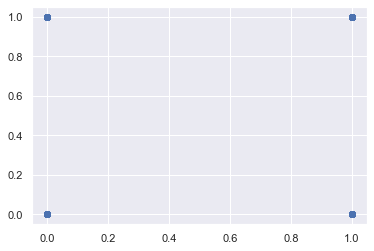

In [2144]:
#fghjkl
plt.scatter(res, train_titanic.Survived)
plt.show()

In [2145]:
print(test_titanic.columns)

Index(['class_surv_prop', 'sex_surv_prop', 'age_surv_prop', 'sib_surv_prop',
       'titles_surv_prop', 'PassengerId'],
      dtype='object')


In [2146]:
list_df_test=[]
for i in test_titanic.values:
    list_df_test.append(i)
print(list_df_test[0])
print('============================')
new_list_df_test=[]
for i in list_df_test:
    new_list_df_test.append(i[0:5])
print(new_list_df_test[0])

new_list_avg_test=[]
for i in new_list_df_test:
    new_list_avg_test.append(sum(i)/5)
print(new_list_avg_test)
res_test=[]
for i in new_list_avg_test:
    if i > 0.3:   # 0.42 = .98
        res_test.append(1)
    else:
        res_test.append(0)
print(res_test)

[2.42362525e-01 1.88908146e-01 4.40677966e-01 3.45394737e-01
 1.56673114e-01 8.92000000e+02]
[0.24236253 0.18890815 0.44067797 0.34539474 0.15667311]
[0.2748032976205121, 0.7170439336630783, 0.3077604166998278, 0.25429776220364136, 0.7196589457696158, 0.26927640005234704, 0.585181510263539, 0.431311527134875, 0.5887378931380368, 0.28163234056686104, 0.25429776220364136, 0.40676662787995194, 0.8711864406779661, 0.43868146933140667, 0.8685714285714287, 0.7657516580692704, 0.32089600992016676, 0.2578541450781392, 0.716102562895118, 0.5861228810314993, 0.5624495852734357, 0.4379417772283626, 0.7367090051718892, 0.4093816399864895, 0.8685714285714287, 0.4109220903650854, 0.7402653880463872, 0.2578541450781392, 0.40676662787995194, 0.27807595769236315, 0.45701480266474004, 0.3277250528665157, 0.7366080983119886, 0.716102562895118, 0.5367463097435705, 0.2578541450781392, 0.585181510263539, 0.5887378931380368, 0.25429776220364136, 0.25429776220364136, 0.2748032976205121, 0.40582525711199163, 0

In [2147]:
id_list=test_titanic['PassengerId'].values.tolist()
submit = pd.DataFrame()
submit['PassengerId'] = id_list
submit['Survived']=res_test
print(submit.head())
submit.to_csv(r'submit_titanic.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         1
2          894         1
3          895         0
4          896         1


In [2148]:
tyjkl;

NameError: name 'tyjkl' is not defined

In [ ]:
print(test_titanic.columns)
print(train_titanic.columns)

print(train_titanic.values[2])
print(test_titanic.values[2])

print(test_titanic['PassengerId'][2])
print(test_titanic.values[2][0])

In [ ]:


 
cols=['sex_surv_prop','titles_surv_prop','class_surv_prop','age_surv_prop'] #sib_surv_prop''class_surv_prop',
y = (train_titanic.Survived)
X=train_titanic[cols] # LogisticRegression(max_iter=10000)
#model =   #GradientBoostingClassifier(n_estimators=10000, learning_rate=0.1, min_samples_split=50,min_samples_leaf=50,max_depth=1000,subsample=0.8,random_state=10)
#model.fit(X,y)
#y_pred = model.predict(X)
#print("The mean absolute error for the data we have is:", round(mean_absolute_error(y,y_pred),3))

In [ ]:
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=30,test_size=0.3)

"""train_tens_x = train_X.to_numpy()
test_tens_x=val_X.to_numpy()

train_tens_y = train_y.to_numpy()
test_tens_y=val_y.to_numpy()

print(train_tens_x.shape)
print(test_tens_x.shape)
print(train_tens_y.shape)
print(test_tens_y.shape)
"""

In [ ]:
"""#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Compile the model
#model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x=train_tens_x, y=train_tens_y, epochs=15)"""

In [ ]:
#thjk

In [ ]:

model.fit(train_X,train_y)
y_pred = model.predict(val_X)
print("The mean absolute error is:", round(mean_absolute_error(val_y,y_pred),3))

In [ ]:
score = round(model.score(train_X, train_y) * 100, 2)
print("The score of the train model is:",score)

score = round(model.score(val_X, val_y) * 100, 2)
print("The score of the test model is:",score)

In [ ]:
rtyukl;


In [ ]:
X_test_titanic=test_titanic[cols]
y_pred_titanic_test = model.predict(X_test_titanic)

id_list=test_titanic['PassengerId'].values.tolist()
submit = pd.DataFrame()
submit['PassengerId'] = id_list
submit['Survived']=y_pred_titanic_test
print(submit.head())
submit.to_csv(r'submit_titanic.csv', index=False)

In [ ]:
d = {'a': [0.1, 0.2,0.3,0.4,0.5,0.6], 'b': [0.6, 0.8,0.3,0.4,0.1,0.1],
     'c': [0.7, 0.3,0.9,0.4,1.0,0.2],'d': [1,0,0,1,0,1]}
df = pd.DataFrame(data=d)

print(df.values)

for i in df.columns:
    for j in range(len(df['a'])):
        if df[i][j]>=0.5:
            df[i][j]=1
        else:
            df[i][j] = 0
print(df.values)
"""def get_equation(x,y,z): # edited line
    degree = 2
    coefs, res,_ ,_ ,_ ,_ = np.polyfit(x,y,z,degree, full = True) #edited line
    ffit = np.poly1d(coefs)
    return ffit
print(get_equation(df['a'],df['b'],df['d'])) # edited line"""

df_vals=['a','b','c','d']
"""
list_df=[]
for i in df.values:
    list_df.append(i)
print(list_df)
print('============================')
new_list_df=[]
for i in list_df:
    new_list_df.append(i[0:3])
print(new_list_df)

new_list_avg=[]
for i in new_list_df:
    new_list_avg.append(sum(i)/3)
print(new_list_avg)
res=[]
for i in new_list_avg:
    if i >= 0.5:
        res.append(1)
    else:
        res.append(0)
print(res)"""